Mount Drive & Unzip


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!unzip /content/drive/MyDrive/archive.zip -d /content/drive/MyDrive/gesture_dataset/

print("Done!")

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/gesture_dataset/train/train/4/460.jpg  
  inflating: /content/drive/MyDrive/gesture_dataset/train/train/4/461.jpg  
  inflating: /content/drive/MyDrive/gesture_dataset/train/train/4/462.jpg  
  inflating: /content/drive/MyDrive/gesture_dataset/train/train/4/463.jpg  
  inflating: /content/drive/MyDrive/gesture_dataset/train/train/4/464.jpg  
  inflating: /content/drive/MyDrive/gesture_dataset/train/train/4/465.jpg  
  inflating: /content/drive/MyDrive/gesture_dataset/train/train/4/466.jpg  
  inflating: /content/drive/MyDrive/gesture_dataset/train/train/4/467.jpg  
  inflating: /content/drive/MyDrive/gesture_dataset/train/train/4/468.jpg  
  inflating: /content/drive/MyDrive/gesture_dataset/train/train/4/469.jpg  
  inflating: /content/drive/MyDrive/gesture_dataset/train/train/4/47.jpg  
  inflating: /content/drive/MyDrive/gesture_dataset/train/train/4/470.jpg  
  inflating: /content/drive/MyDrive/ge

 Check Structure

In [ ]:
import os

path = "/content/drive/MyDrive/gesture_dataset/"

for item in os.listdir(path):
    print(item)

test
train


Check Inside Train Folder

In [ ]:
import os

TRAIN_DIR = "/content/drive/MyDrive/gesture_dataset/train/train/"
TEST_DIR  = "/content/drive/MyDrive/gesture_dataset/test/test/"

classes = os.listdir(TRAIN_DIR)
print("Classes found:", classes)
print("Total classes:", len(classes))

print("\nImages per class:")
for cls in sorted(classes):
    train_count = len(os.listdir(os.path.join(TRAIN_DIR, cls)))
    test_count  = len(os.listdir(os.path.join(TEST_DIR, cls)))
    print(f"  {cls}: {train_count} train | {test_count} test")

Classes found: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '3', '4', '5', '6', '7', '8', '9']
Total classes: 20

Images per class:
  0: 900 train | 300 test
  1: 900 train | 300 test
  10: 900 train | 300 test
  11: 900 train | 300 test
  12: 900 train | 300 test
  13: 900 train | 300 test
  14: 900 train | 300 test
  15: 900 train | 300 test
  16: 900 train | 300 test
  17: 900 train | 300 test
  18: 900 train | 300 test
  19: 900 train | 300 test
  2: 900 train | 300 test
  3: 900 train | 300 test
  4: 900 train | 300 test
  5: 900 train | 300 test
  6: 900 train | 300 test
  7: 900 train | 300 test
  8: 900 train | 300 test
  9: 900 train | 300 test


 Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


Load & Preprocess Images

In [ ]:
IMG_SIZE = (64, 64)
BATCH_SIZE = 64

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    class_mode='categorical', subset='training', shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    class_mode='categorical', subset='validation', shuffle=False
)

test_gen = test_datagen.flow_from_directory(
    TEST_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=False
)

class_names = list(train_gen.class_indices.keys())
num_classes = len(class_names)

print("\n--- Dataset Info ---")
print(f"Number of classes: {num_classes}")
print(f"Class labels: {class_names}")
print(f"Training samples:   {train_gen.samples}")
print(f"Validation samples: {val_gen.samples}")
print(f"Test samples:       {test_gen.samples}")

Found 14400 images belonging to 20 classes.
Found 3600 images belonging to 20 classes.
Found 6000 images belonging to 20 classes.

--- Dataset Info ---
Number of classes: 20
Class labels: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '3', '4', '5', '6', '7', '8', '9']
Training samples:   14400
Validation samples: 3600
Test samples:       6000


Check Class Distribution

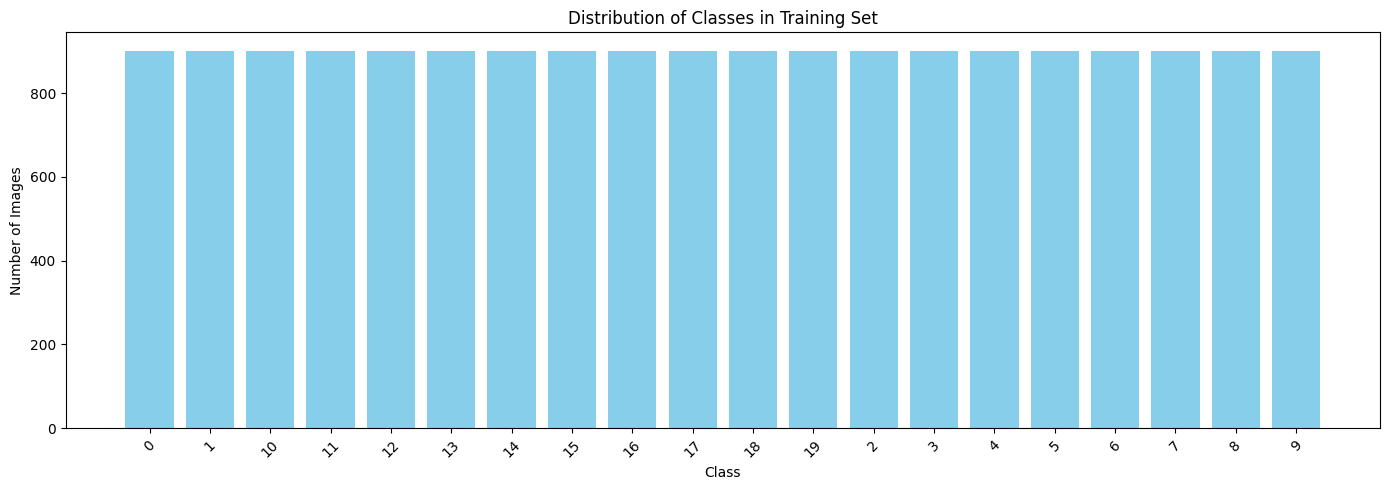

Images per class:
  0: 900 images
  1: 900 images
  10: 900 images
  11: 900 images
  12: 900 images
  13: 900 images
  14: 900 images
  15: 900 images
  16: 900 images
  17: 900 images
  18: 900 images
  19: 900 images
  2: 900 images
  3: 900 images
  4: 900 images
  5: 900 images
  6: 900 images
  7: 900 images
  8: 900 images
  9: 900 images


In [ ]:
class_counts = {}
for cls in sorted(class_names):
    count = len(os.listdir(os.path.join(TRAIN_DIR, cls)))
    class_counts[cls] = count

plt.figure(figsize=(14, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Classes in Training Set')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/class_distribution.png')
plt.show()

print("Images per class:")
for name, count in class_counts.items():
    print(f"  {name}: {count} images")

Display Sample Images

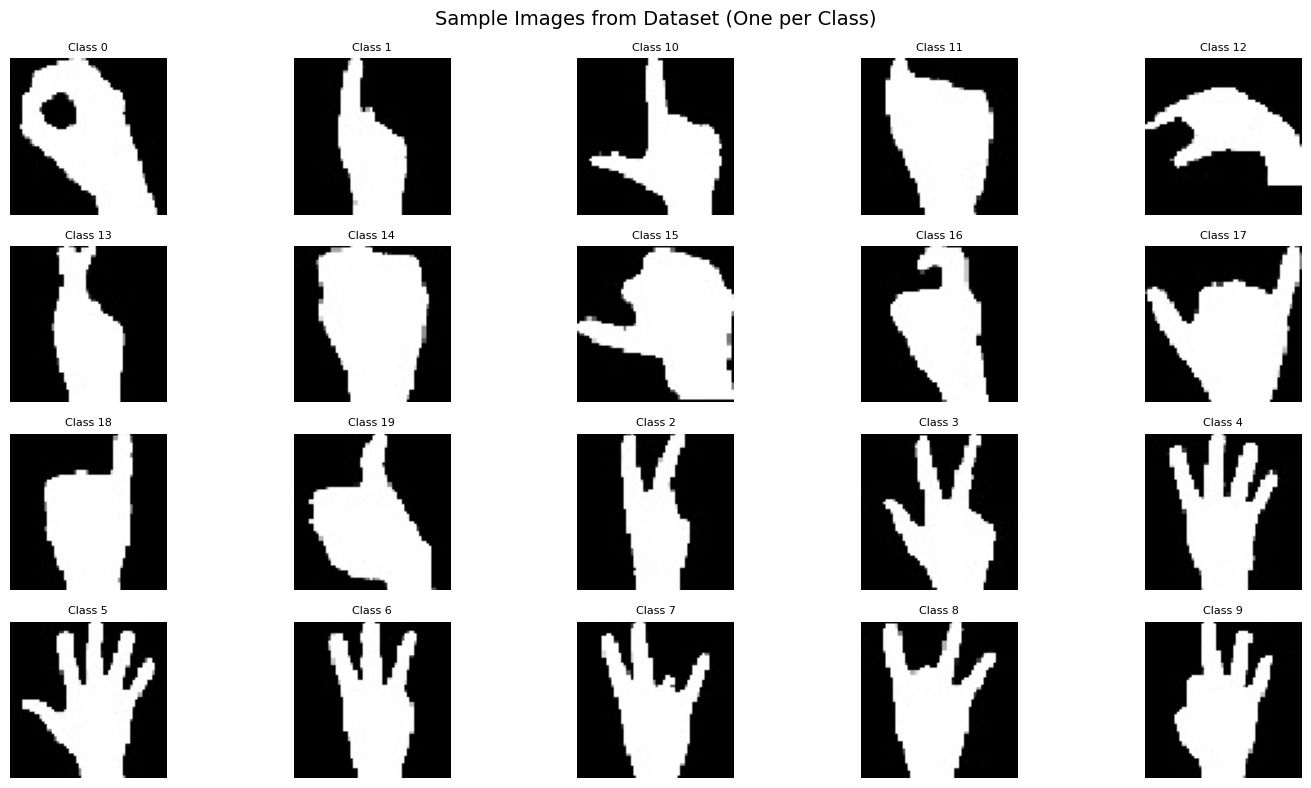

In [ ]:
import os

plt.figure(figsize=(15, 8))
for i, cls in enumerate(sorted(class_names)):
    cls_folder = os.path.join(TRAIN_DIR, cls)
    img_file = os.listdir(cls_folder)[0]
    img_path = os.path.join(cls_folder, img_file)

    img = tf.keras.utils.load_img(img_path, target_size=(64, 64))
    img_array = tf.keras.utils.img_to_array(img) / 255.0

    plt.subplot(4, 5, i+1)
    plt.imshow(img_array)
    plt.title(f"Class {cls}", fontsize=8)
    plt.axis('off')

plt.suptitle('Sample Images from Dataset (One per Class)', fontsize=14)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/sample_images.png')
plt.show()

Build CNN Model

In [ ]:
model = models.Sequential([

    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 685,780 (2.62 MB)

 Trainable params: 685,780 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

Compile & Train

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_gen,
    epochs=20,
    validation_data=val_gen,
    verbose=1
)

print("\nTraining completed!")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 253s 1s/step - accuracy: 0.8593 - loss: 0.5111 - val_accuracy: 0.9994 - val_loss: 0.0015
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step - accuracy: 0.9992 - loss: 0.0035 - val_accuracy: 0.9908 - val_loss: 0.0177
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 292s 1s/step - accuracy: 1.0000 - loss: 5.4840e-05 - val_accuracy: 0.9917 - val_loss: 0.0181
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 1.0000 - loss: 1.2569e-05 - val_accuracy: 0.9911 - val_loss: 0.0230
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 260s 1s/step - accuracy: 1.0000 - loss: 7.3187e-06 - val_accuracy: 0.9919 - val_loss: 0.0153
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 260s 1s/step - accuracy: 1.0000 - loss: 2.4498e-06 - val_accuracy: 0.9928 - val_loss: 0.0120
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 260s 1s/step - accuracy: 1.0000 - loss: 1.7528e-06 - val_accuracy: 0.9942 - val_loss: 0.0103
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 1.0000 - los

Plot Training Curves

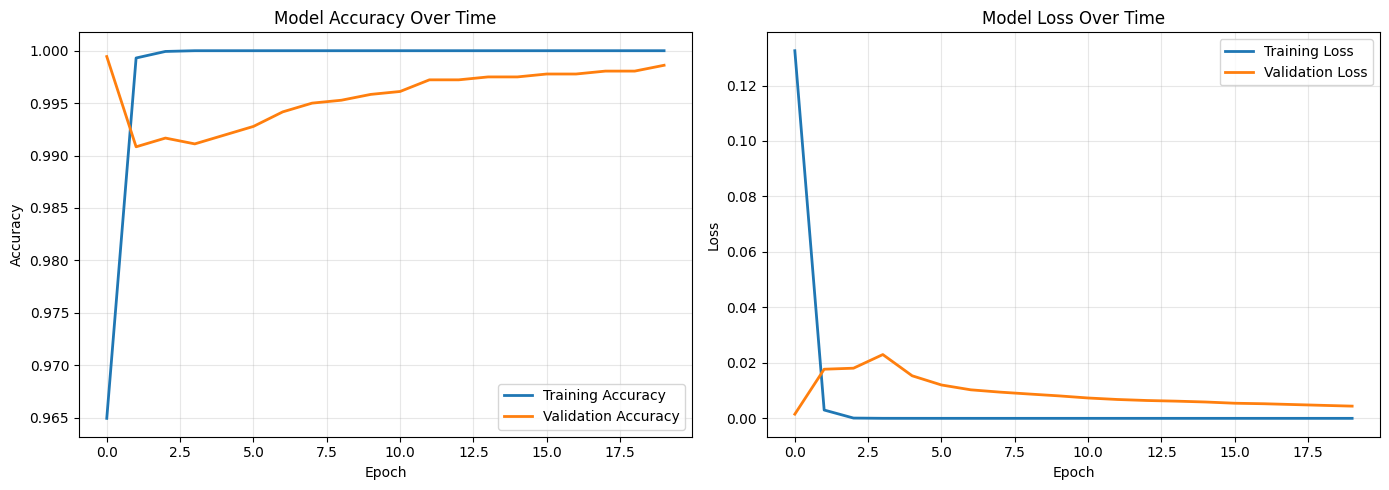

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Time')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss Over Time')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/training_curves.png')
plt.show()

Evaluate on Test Set

In [ ]:
test_loss, test_accuracy = model.evaluate(test_gen, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss:     {test_loss:.4f}")

test_gen.reset()
y_pred = np.argmax(model.predict(test_gen, verbose=0), axis=1)
y_true = test_gen.classes

Test Accuracy: 99.98%
Test Loss:     0.0004


Classification Report

In [ ]:
print("\nClassification Report:")
print("=" * 60)
print(classification_report(y_true, y_pred, target_names=class_names, digits=3))


Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       300
           1      1.000     1.000     1.000       300
          10      1.000     1.000     1.000       300
          11      0.997     1.000     0.998       300
          12      1.000     1.000     1.000       300
          13      1.000     1.000     1.000       300
          14      1.000     1.000     1.000       300
          15      1.000     1.000     1.000       300
          16      1.000     1.000     1.000       300
          17      1.000     1.000     1.000       300
          18      1.000     0.997     0.998       300
          19      1.000     1.000     1.000       300
           2      1.000     1.000     1.000       300
           3      1.000     1.000     1.000       300
           4      1.000     1.000     1.000       300
           5      1.000     1.000     1.000       300
           6      1.000     1.000     1.000       300
   

Confusion Matrix

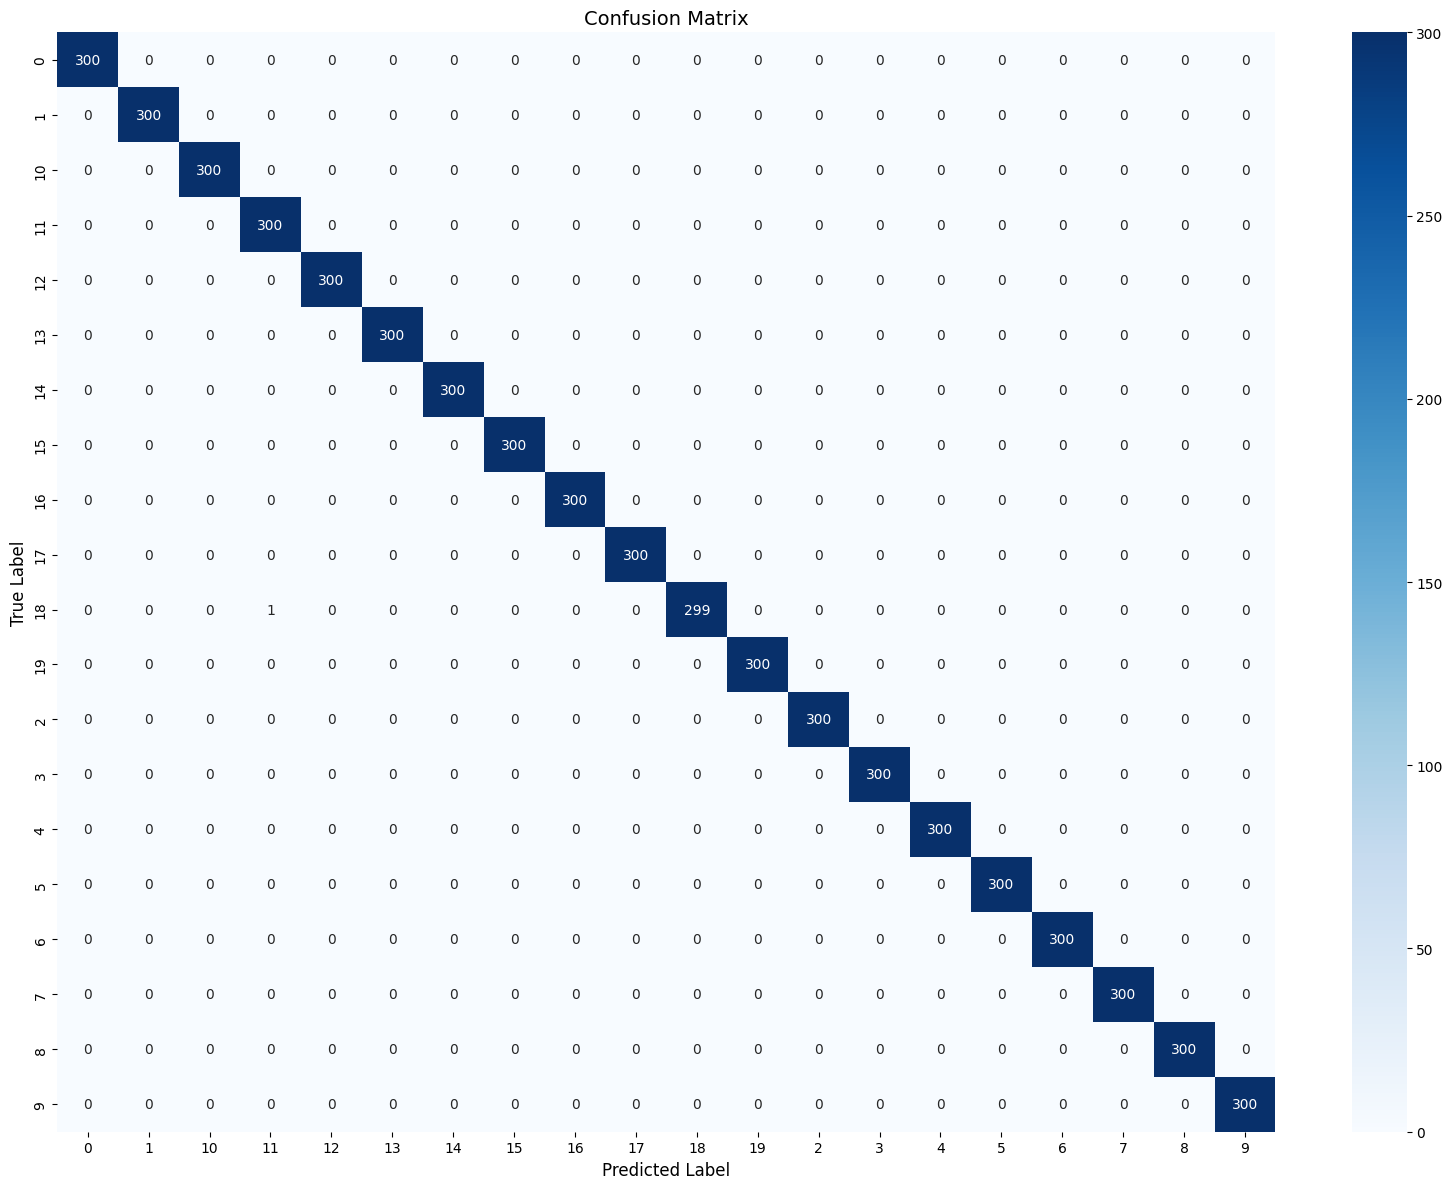

In [ ]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(16, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/confusion_matrix.png')
plt.show()

Sample Predictions

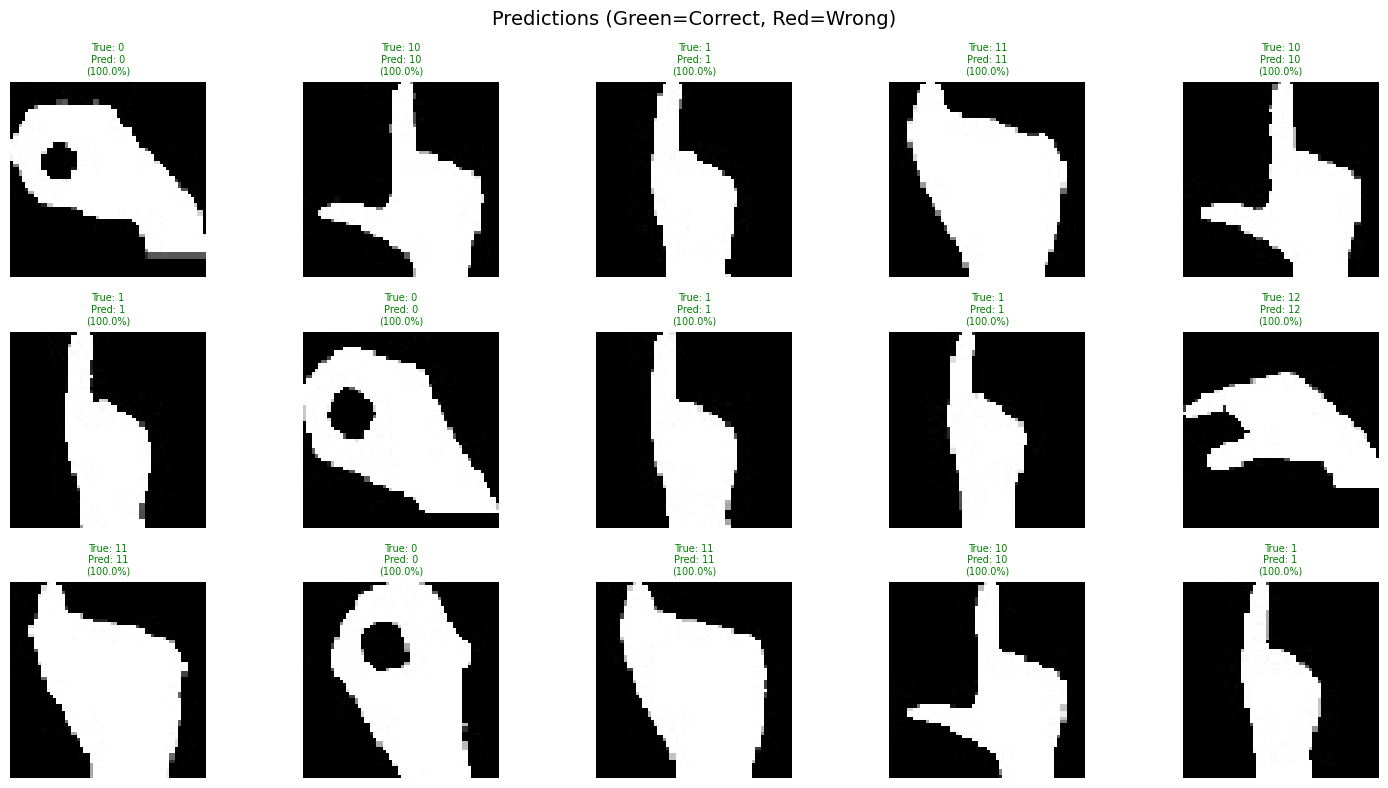

In [ ]:
import random

test_gen.reset()
all_imgs = []
all_lbls = []

for _ in range(20):
    imgs, lbls = next(test_gen)
    all_imgs.append(imgs)
    all_lbls.append(lbls)

all_imgs = np.concatenate(all_imgs)
all_lbls = np.concatenate(all_lbls)

indices = random.sample(range(len(all_imgs)), 15)
preds = model.predict(all_imgs[indices], verbose=0)

plt.figure(figsize=(15, 8))
for i, idx in enumerate(indices):
    plt.subplot(3, 5, i+1)
    plt.imshow(all_imgs[idx])
    true_label = class_names[np.argmax(all_lbls[idx])]
    pred_label = class_names[np.argmax(preds[i])]
    confidence = np.max(preds[i]) * 100
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}\n({confidence:.1f}%)",
              color=color, fontsize=7)
    plt.axis('off')
plt.suptitle('Predictions (Green=Correct, Red=Wrong)', fontsize=14)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/predictions.png')
plt.show()

Save Model

In [32]:
model.save('/content/drive/MyDrive/HandGestureRecognition.keras')
print("Model saved as HandGestureRecognition.keras in Google Drive!")

Model saved as HandGestureRecognition.keras in Google Drive!
